# Analisi dati preliminare esperienza 10 marzo 2021

breve analisi dati modello diamico

In [1]:
import os
import numpy as np
import pandas as pd

ALL_FILES = [
    'p_oscillazioni_NNx10.csv'
]
BASE_PATH = os.getcwd()
DATA_PATH = os.path.join(os.getcwd(), '../../dati')

data_csv = pd.read_csv(os.path.join(DATA_PATH, ALL_FILES[0]), sep=',')

# dividendo per 9 invece che per 10 ritorna il valore corretto di k come parametro di fit
T_before = np.array([(data_csv[line]/9).mean() for line in data_csv])
err_T_before = np.array([(data_csv[line]/9).std()/np.sqrt(data_csv[line].size) for line in data_csv])
M_before = np.array([261.499, 535.07275, 650.44700, 796.66900, 1035.6340, 393.09100, 916.85700])/1000
err_M_before = np.array([0.004, 0.008, 0.012, 0.012, 0.016, 0.008, 0.016])/(1000*np.sqrt(3))


# array privati del 2' punto, che causa evidente errore.
M = np.array([m for id_m, m in enumerate(M_before, start=1) if id_m!=2])
T = np.array([t for id_t, t in enumerate(T_before, start=1) if id_t!=2])
err_M = np.array([ex for id_ex, ex in enumerate(err_M_before, start=1) if id_ex!=2])
err_T = np.array([ey for id_ey, ey in enumerate(err_T_before, start=1) if id_ey!=2])

In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline
%config InlineBackend.figure_format='retina'

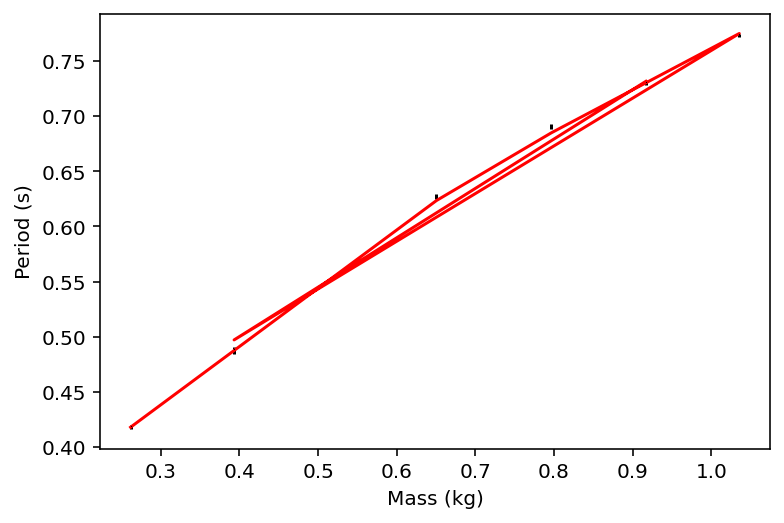

[71.68243979  0.16606529] [0.81019722 0.02480318]
k_dyn 71.68243979250362 +/- 0.8101972227613521
m_spring_dyn 0.16606529110914375 +/- 0.02480317765584748


In [3]:
def f_nonlin(x, k, m):
    return 2*np.pi*np.sqrt((x+(m/3))/k)


plt.errorbar(M, 
             T, 
             yerr=err_T, 
             xerr=err_M, 
             fmt='k,')
popt, pcov = curve_fit(f_nonlin, M, T, p0=[70, 0.080], sigma=err_T)
plt.plot(M, f_nonlin(M, *popt), 'r-')
plt.xlabel('Mass (kg)')
plt.ylabel('Period (s)')
plt.show()
print(popt, np.sqrt(np.diag(pcov)))
print('k_dyn', popt[0], '+/-', np.sqrt(np.diag(pcov))[0])
print('m_spring_dyn', popt[1], '+/-', np.sqrt(np.diag(pcov))[1])

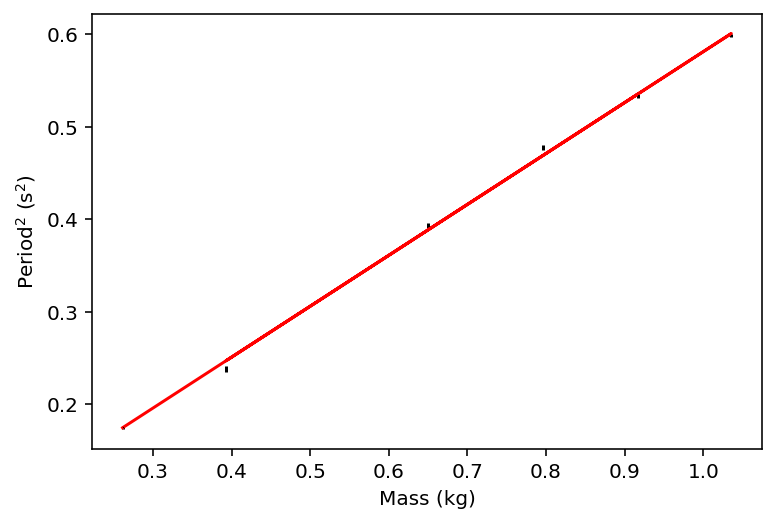

[0.55074721 0.03044689] [0.00622809 0.00424864]
k_dyn_lin 71.68155735564031
m_spring_dyn_lin 0.16584863754683132


In [4]:
T2 = T**2
err_T2 = 2*T*err_T

def f(x, a, b):
    return a*x+b

plt.errorbar(M, 
             T2, 
             yerr=err_T2, 
             xerr=err_M,
             fmt=',k')
popt_lin, pcov_lin = curve_fit(f, M, T2, sigma=err_T2)
plt.plot(M, f(M, *popt_lin), 'r-')
plt.xlabel('Mass (kg)')
plt.ylabel('Period$^2$ (s$^2$)')
plt.show()

print(popt_lin, np.sqrt(np.diag(pcov_lin)))

print('k_dyn_lin', 4*(np.pi**2)/popt_lin[0])
print('m_spring_dyn_lin', 3*popt_lin[1]/popt_lin[0])